# U.S. Oil and Gas Production Analysis

Analyzing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.

In [2]:
import numpy as np
import pandas as pd
import matplotlib

---

Let's load the Gas production:

In [12]:
file = "data/U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [14]:
# Check how many rows and columns in the dataframe
gas_df.shape

(121, 20)

In [15]:
# Display all the available column names in the dataframe
gas_df.columns

Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [16]:
# Display additional info about each columns such as data types and number of non-null values
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Month                             121 non-null    object
 1   U.S.                              121 non-null    int64 
 2   Alaska                            121 non-null    int64 
 3   Arkansas                          121 non-null    int64 
 4   Kansas                            121 non-null    int64 
 5   Other States                      121 non-null    int64 
 6   Federal Offshore--Gulf of Mexico  121 non-null    int64 
 7   Wyoming                           121 non-null    int64 
 8   West Virginia                     121 non-null    int64 
 9   Utah                              121 non-null    int64 
 10  Pennsylvania                      121 non-null    int64 
 11  Texas                             121 non-null    int64 
 12  Oklahoma              

In [17]:
gas_df["Month"] = pd.to_datetime(gas_df["Month"])

### Check your code

In [18]:
month_type = gas_df['Month'].dtype

In [20]:
from nbresult import ChallengeResult

result = ChallengeResult('date',
    month_type=month_type,
)
result.write()

In [21]:
print(result.check())



============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/02-Data-Toolkit/01-Data-Analysis/data-us-oil-and-gas-production/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_date.py::TestDate::test_month_column_is_a_datetime PASSED           [100%]

============================== 1 passed in 0.31s ===============================


💯 You can commit your code:

git add tests/date.pickle

git commit -m 'Completed date step'

git push origin master



In [25]:
gas_df['Month'].dt.year.head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Month, dtype: int64

In [26]:
gas_df['Month'].dt.month.tail()

116    2
117    3
118    4
119    5
120    6
Name: Month, dtype: int64

---

## Yearly Gas production

In [42]:
yearly_gas_df = gas_df.groupby(gas_df["Month"].dt.year).sum()
yearly_gas_df.head(2)

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071


### Check your code

In [34]:
index_year = yearly_gas_df.index[0]
yearly_gas_shape = yearly_gas_df.shape
us_total = yearly_gas_df.iloc[0,0]

In [35]:
from nbresult import ChallengeResult

result = ChallengeResult('full_gas',
    index_year=index_year,
    yearly_gas_shape=yearly_gas_shape,
    us_total=us_total
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/02-Data-Toolkit/01-Data-Analysis/data-us-oil-and-gas-production/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 3 items

test_full_gas.py::TestFullGas::test_df_has_the_right_index PASSED        [ 33%]
test_full_gas.py::TestFullGas::test_df_has_the_right_shape PASSED        [ 66%]
test_full_gas.py::TestFullGas::test_df_has_the_right_values PASSED       [100%]

============================== 3 passed in 0.41s ===============================


💯 You can commit your code:

git add tests/full_gas.pickle

git commit -m 'Completed full_gas step'

git push origin master



<AxesSubplot:xlabel='Month'>

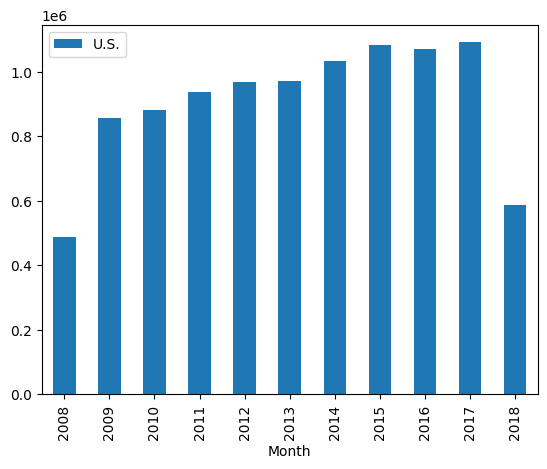

In [44]:
yearly_gas_df.filter(items=["U.S."]).plot(kind="bar")

<AxesSubplot:xlabel='Month'>

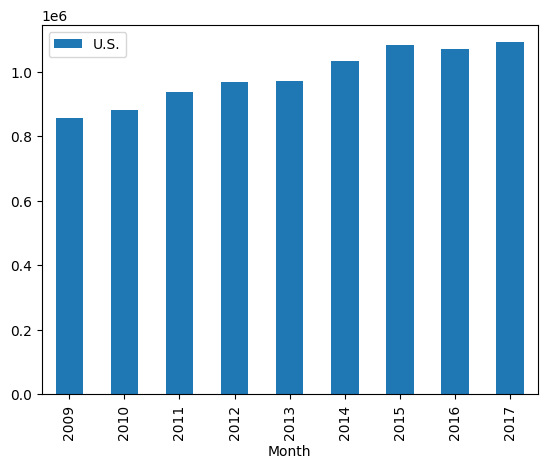

In [48]:
filtered_yearly_gas_df = yearly_gas_df[(yearly_gas_df.index > 2008) & (yearly_gas_df.index <  2018)]
filtered_yearly_gas_df.filter(items=["U.S."]).plot(kind="bar")

### Check your code

In [49]:
from nbresult import ChallengeResult

result = ChallengeResult('filtered_gas',
    yearly_gas=filtered_yearly_gas_df.shape
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/02-Data-Toolkit/01-Data-Analysis/data-us-oil-and-gas-production/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_filtered_gas.py::TestFilteredGas::test_yearly_gas_production_df_has_the_right_shape PASSED [100%]

============================== 1 passed in 0.05s ===============================


💯 You can commit your code:

git add tests/filtered_gas.pickle

git commit -m 'Completed filtered_gas step'

git push origin master



## State production

Let's have a look at the yearly production of some specific states

In [50]:
filtered_yearly_gas_df.columns[1:].sort_values()

Index(['Alaska', 'Arkansas', 'California', 'Colorado',
       'Federal Offshore--Gulf of Mexico', 'Kansas', 'Louisiana', 'Montana',
       'New Mexico', 'North Dakota', 'Ohio', 'Oklahoma', 'Other States',
       'Pennsylvania', 'Texas', 'Utah', 'West Virginia', 'Wyoming'],
      dtype='object')

Text(0.5, 0, 'Year')

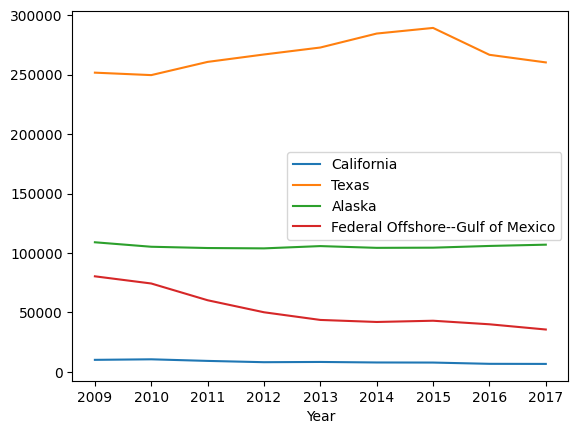

In [56]:
plot = filtered_yearly_gas_df.filter(
    items=["California", "Texas", "Alaska", "Federal Offshore--Gulf of Mexico"]
    ).plot()

plot.set_xlabel("Year")

---

## Comparing with Crude Oil Production

In [58]:
file = "data/U.S._crude_oil_production.csv"
oil_df = pd.read_csv(file, decimal=",")

display(oil_df.info())
display(oil_df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Month                                      121 non-null    object
 1   U.S. Crude Oil                             121 non-null    int64 
 2   Alabama                                    121 non-null    int64 
 3   Alaska                                     121 non-null    int64 
 4   Arkansas                                   121 non-null    int64 
 5   Arizona                                    121 non-null    int64 
 6   California                                 121 non-null    int64 
 7   Colorado                                   121 non-null    int64 
 8   Federal Offshore Gulf of Mexico Crude Oil  121 non-null    int64 
 9   Federal Offshore Pacific Crude Oil         121 non-null    int64 
 10  Florida                               

None

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1


In [60]:
oil_df["Month"] = pd.to_datetime(oil_df["Month"])

---

## Yearly Oil production

In [65]:
yearly_oil_df = oil_df.groupby(oil_df["Month"].dt.year).sum()
yearly_oil_df.head(2)

,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,Florida,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
Month,,,,,,,,,,,,,,,,,,,,,
2008,34211,149,4666,118,0,4095,589,7302,465,37,...,98,1286,56,35,1013,39,0,438,7773,7
2009,64180,236,7749,189,0,6815,998,18727,734,24,...,156,2144,96,55,1695,48,0,757,13132,12


In [70]:
yearly_oil_df.columns = yearly_oil_df.columns.str.strip()

<AxesSubplot:xlabel='Month'>

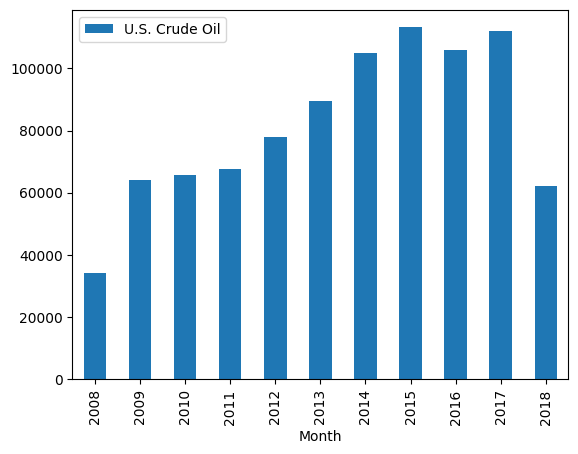

In [73]:
yearly_oil_df.filter(items=['U.S. Crude Oil']).plot(kind='bar')

In [80]:
filtered_yearly_oil_df = yearly_oil_df[(yearly_oil_df.index > 2008) & (yearly_oil_df.index < 2018)]

<AxesSubplot:xlabel='Month'>

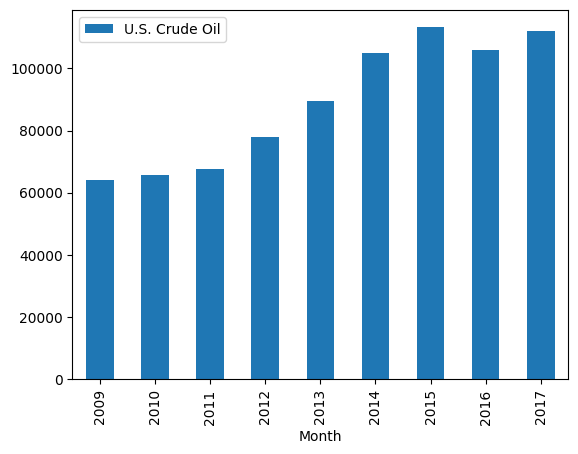

In [81]:
filtered_yearly_oil_df.filter(items=['U.S. Crude Oil']).plot(kind='bar')

### Check your code


In [83]:
from nbresult import ChallengeResult

result = ChallengeResult('oil',
    filtered_oil_shape=filtered_yearly_oil_df.shape,
    filtered_oil_index_year=filtered_yearly_oil_df.index[0],
    us_total=filtered_yearly_oil_df.iloc[0,0]
)
result.write()

print(result.check())



============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/02-Data-Toolkit/01-Data-Analysis/data-us-oil-and-gas-production/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 3 items

test_oil.py::TestOil::test_df_has_the_right_index PASSED                 [ 33%]
test_oil.py::TestOil::test_df_has_the_right_shape PASSED                 [ 66%]
test_oil.py::TestOil::test_df_has_the_right_values PASSED                [100%]

============================== 3 passed in 0.28s ===============================


💯 You can commit your code:

git add tests/oil.pickle

git commit -m 'Completed oil step'

git push origin master



## Merging Oil and Gas Production


In [91]:
total_gas = filtered_yearly_gas_df[["U.S."]]
total_gas = total_gas.rename(columns={"U.S.": "Gas"})
total_gas.head(2)

,Gas
Month,
2009,856876
2010,881622


In [96]:
total_oil = filtered_yearly_oil_df[["U.S. Crude Oil"]]
total_oil = total_oil.rename(columns={"U.S. Crude Oil": "Crude Oil"})
total_oil.head(2)

,Crude Oil
Month,
2009,64180
2010,65741


In [98]:
merged_df = pd.concat([total_gas, total_oil], axis=1)
merged_df.head()

,Gas,Crude Oil
Month,,
2009,856876,64180
2010,881622,65741
2011,936163,67829
2012,968632,78007
2013,970617,89585


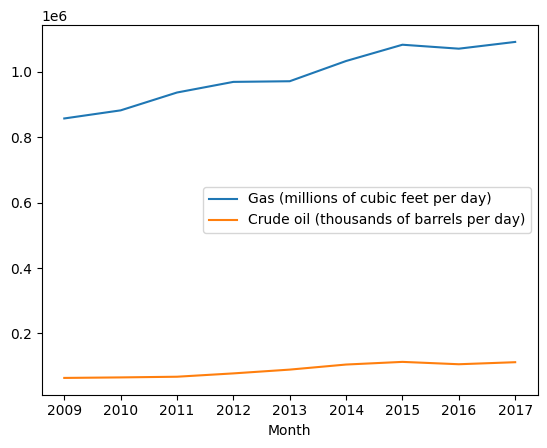

In [104]:
plot = merged_df.plot()
plot.legend(["Gas (millions of cubic feet per day)", "Crude oil (thousands of barrels per day)"])


### Check your code

In [105]:
from nbresult import ChallengeResult

result = ChallengeResult('merged_dataframes',
    merged_df_shape=merged_df.shape,
    yearly_oil_2009=merged_df.iloc[0]["Crude Oil"],
)
result.write()

print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/02-Data-Toolkit/01-Data-Analysis/data-us-oil-and-gas-production/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_merged_dataframes.py::TestMergedDataframes::test_merged_df_has_the_right_shape PASSED [ 50%]
test_merged_dataframes.py::TestMergedDataframes::test_yearly_oil_value_2009 PASSED [100%]

============================== 2 passed in 0.20s ===============================


💯 You can commit your code:

git add tests/merged_dataframes.pickle

git commit -m 'Completed merged_dataframes step'

git push origin master

